In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tr_data = pd.read_csv('E:/kaggle_games/loan_prediction/train.csv')
te_data = pd.read_csv('E:/kaggle_games/loan_prediction/test.csv')

In [3]:
tr_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
tr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
te_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
te_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
te_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
tr_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
te_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
# 观察各特征与是否贷到款的关系
def bar_chart(feature):
    loaned = tr_data[tr_data['Loan_Status']=='Y'][feature].value_counts()
    noloan = tr_data[tr_data['Loan_Status']=='N'][feature].value_counts()
    df = pd.DataFrame([loaned,noloan], index=['loaned','noloan'])
    df.plot(kind='bar', stacked=True, figsize=(10,5))    

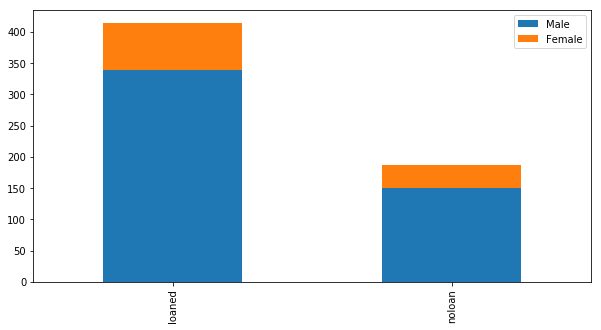

In [12]:
bar_chart('Gender')

In [13]:
tr_data[tr_data['Loan_Status']=='Y']['Gender'].value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

In [14]:
339/(339+150)

0.6932515337423313

In [15]:
75/(75+37)

0.6696428571428571

In [16]:
tr_data[tr_data['Loan_Status']=='N']['Gender'].value_counts()

Male      150
Female     37
Name: Gender, dtype: int64

In [17]:
# 结论：男性与女性在贷款中的表现差别轻微

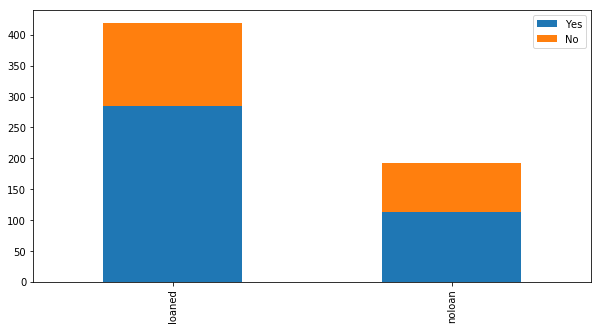

In [18]:
bar_chart('Married')

In [19]:
tr_data[tr_data['Loan_Status']=='Y']['Married'].value_counts()

Yes    285
No     134
Name: Married, dtype: int64

In [20]:
tr_data[tr_data['Loan_Status']=='N']['Married'].value_counts()

Yes    113
No      79
Name: Married, dtype: int64

In [21]:
285/(285+113)

0.7160804020100503

In [22]:
134/(134+79)

0.6291079812206573

In [23]:
# 结论：结婚更容易接到贷款

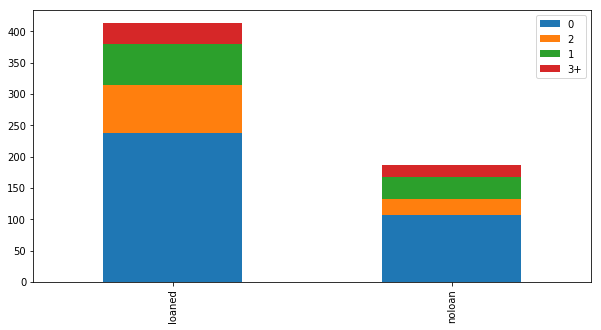

In [24]:
bar_chart('Dependents')

In [25]:
tr_data[tr_data['Loan_Status']=='Y']['Dependents'].value_counts()

0     238
2      76
1      66
3+     33
Name: Dependents, dtype: int64

In [26]:
tr_data[tr_data['Loan_Status']=='N']['Dependents'].value_counts()

0     107
1      36
2      25
3+     18
Name: Dependents, dtype: int64

In [27]:
238/(238+107)

0.6898550724637681

In [28]:
66/(66+36)

0.6470588235294118

In [29]:
76/(76+25)

0.7524752475247525

In [30]:
33/(33+18)

0.6470588235294118

In [31]:
# 结论：不同家属数量影响贷款成功率，0个或2个稍高。

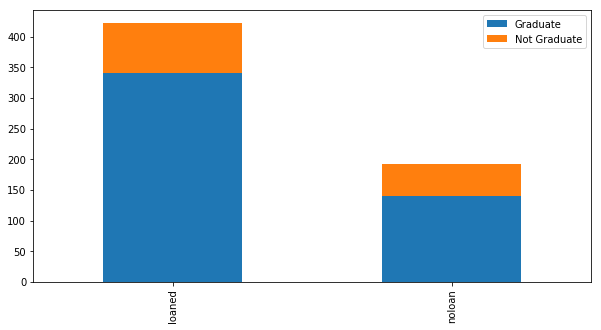

In [32]:
bar_chart('Education')

In [33]:
tr_data[tr_data['Loan_Status']=='Y']['Education'].value_counts()

Graduate        340
Not Graduate     82
Name: Education, dtype: int64

In [34]:
tr_data[tr_data['Loan_Status']=='N']['Education'].value_counts()

Graduate        140
Not Graduate     52
Name: Education, dtype: int64

In [35]:
340/(340+140)

0.7083333333333334

In [36]:
82/(82+52)

0.6119402985074627

In [37]:
#结论：毕业的贷款成功率明显高于未毕业的

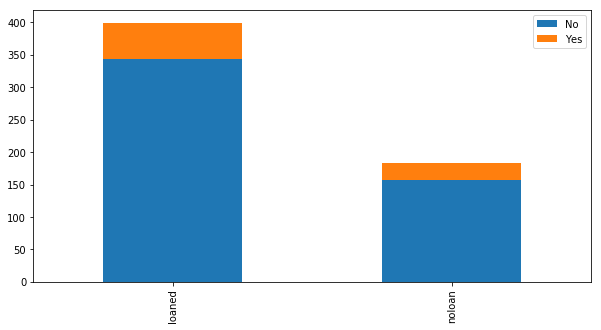

In [38]:
bar_chart('Self_Employed')

In [39]:
tr_data[tr_data['Loan_Status']=='Y']['Self_Employed'].value_counts()

No     343
Yes     56
Name: Self_Employed, dtype: int64

In [40]:
tr_data[tr_data['Loan_Status']=='N']['Self_Employed'].value_counts()

No     157
Yes     26
Name: Self_Employed, dtype: int64

In [41]:
343/(343+157)

0.686

In [42]:
56/(56+26)

0.6829268292682927

In [43]:
# 结论：是否私营工作者不影响贷款成功率

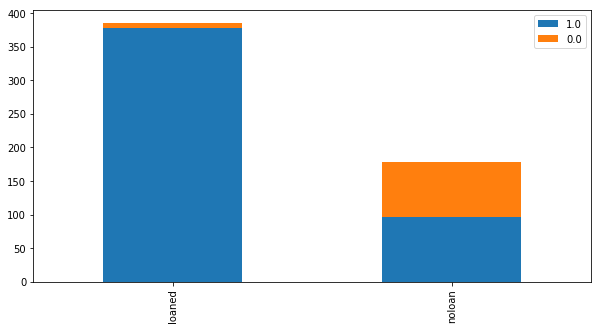

In [44]:
bar_chart('Credit_History')

In [45]:
# 结论：曾经使用过信用卡的更容易贷到款

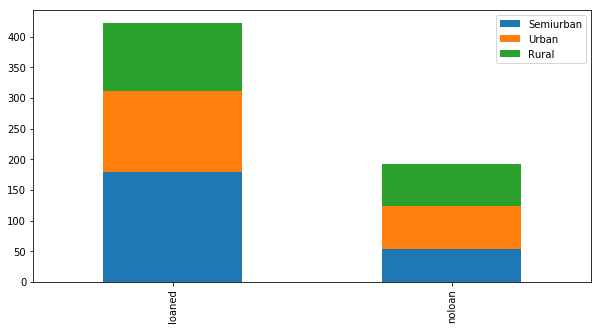

In [46]:
bar_chart('Property_Area')

In [47]:
tr_data[tr_data['Loan_Status']=='Y']['Property_Area'].value_counts()

Semiurban    179
Urban        133
Rural        110
Name: Property_Area, dtype: int64

In [48]:
tr_data[tr_data['Loan_Status']=='N']['Property_Area'].value_counts()

Rural        69
Urban        69
Semiurban    54
Name: Property_Area, dtype: int64

In [49]:
179/(179+54)

0.7682403433476395

In [50]:
133/(133+69)

0.6584158415841584

In [51]:
110/(110+69)

0.6145251396648045

In [52]:
#结论：不同区域影响贷款成功率

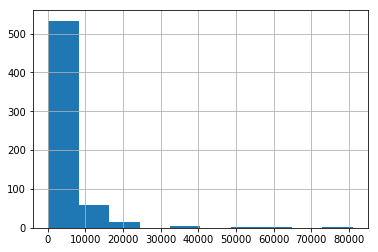

In [53]:
tr_data['ApplicantIncome'].hist(bins=10)

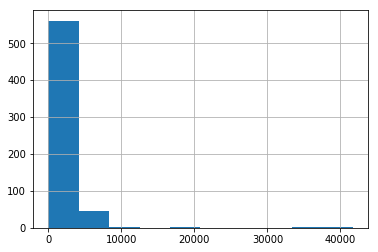

In [54]:
tr_data['CoapplicantIncome'].hist(bins=10)

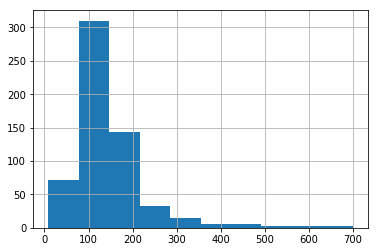

In [55]:
tr_data['LoanAmount'].hist(bins=10)

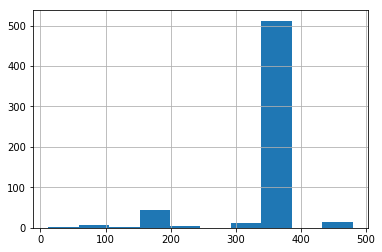

In [56]:
tr_data['Loan_Amount_Term'].hist(bins=10)

In [57]:
np.histogram(tr_data['ApplicantIncome'])

(array([533,  59,  15,   0,   4,   0,   1,   1,   0,   1], dtype=int64),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]))

In [58]:
tr_data['ApplicantIncome'][(tr_data['ApplicantIncome'] < 8235)] = 0
tr_data['ApplicantIncome'][(tr_data['ApplicantIncome'] < 16320) & (tr_data['ApplicantIncome'] >= 8235)] = 1
tr_data['ApplicantIncome'][(tr_data['ApplicantIncome'] >= 16320)] = 2

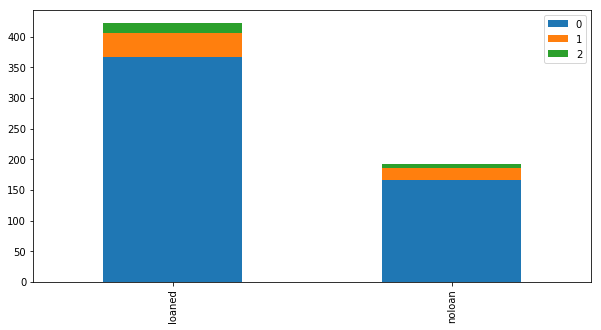

In [59]:
bar_chart('ApplicantIncome')

In [60]:
tr_data[tr_data['Loan_Status']=='Y']['ApplicantIncome'].value_counts()

0    367
1     39
2     16
Name: ApplicantIncome, dtype: int64

In [61]:
tr_data[tr_data['Loan_Status']=='N']['ApplicantIncome'].value_counts()

0    166
1     20
2      6
Name: ApplicantIncome, dtype: int64

In [62]:
367/(367+166)

0.6885553470919324

In [63]:
39/(39+20)

0.6610169491525424

In [64]:
16/(16+6)

0.7272727272727273

In [65]:
np.histogram(tr_data['CoapplicantIncome'])

(array([561,  46,   3,   0,   2,   0,   0,   0,   1,   1], dtype=int64),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]))

In [66]:
tr_data['CoapplicantIncome'][(tr_data['CoapplicantIncome'] < 4166.7)] = 0
tr_data['CoapplicantIncome'][(tr_data['CoapplicantIncome'] < 8333.4) & (tr_data['CoapplicantIncome'] >= 4166.7)] = 1
tr_data['CoapplicantIncome'][(tr_data['CoapplicantIncome'] >= 8333.4)] = 2

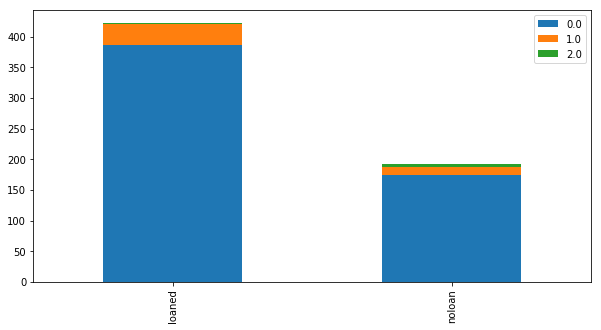

In [67]:
bar_chart('CoapplicantIncome')

In [68]:
tr_data[tr_data['Loan_Status']=='Y']['CoapplicantIncome'].value_counts()

0.0    387
1.0     33
2.0      2
Name: CoapplicantIncome, dtype: int64

In [69]:
tr_data[tr_data['Loan_Status']=='N']['CoapplicantIncome'].value_counts()

0.0    174
1.0     13
2.0      5
Name: CoapplicantIncome, dtype: int64

In [70]:
387/(387+174)

0.6898395721925134

In [71]:
33/(33+13)

0.717391304347826

In [72]:
2/(2+5)

0.2857142857142857

In [73]:
tr_data['LoanAmount'] = tr_data['LoanAmount'].fillna(tr_data['LoanAmount'].mean())

In [74]:
np.histogram(tr_data['LoanAmount'])

(array([ 72, 332, 143,  33,  15,   6,   5,   3,   3,   2], dtype=int64),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]))

In [75]:
tr_data['LoanAmount'][(tr_data['LoanAmount'] < 78.1)] = 0
tr_data['LoanAmount'][(tr_data['LoanAmount'] < 147.2) & (tr_data['LoanAmount'] >= 78.1)] = 1
tr_data['LoanAmount'][(tr_data['LoanAmount'] < 216.3) & (tr_data['LoanAmount'] >= 147.2)] = 2
tr_data['LoanAmount'][(tr_data['LoanAmount'] >= 216.3)] = 3

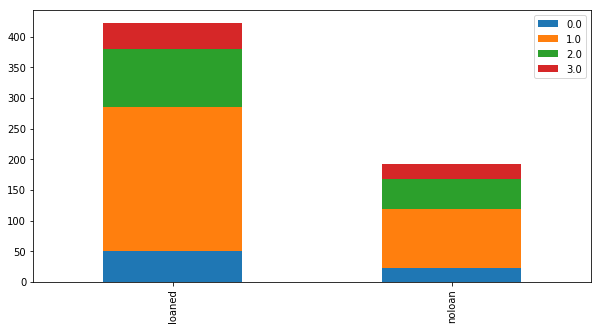

In [76]:
bar_chart('LoanAmount')

In [77]:
tr_data[tr_data['Loan_Status']=='Y']['LoanAmount'].value_counts()

1.0    235
2.0     95
0.0     50
3.0     42
Name: LoanAmount, dtype: int64

In [78]:
tr_data[tr_data['Loan_Status']=='N']['LoanAmount'].value_counts()

1.0    97
2.0    48
3.0    25
0.0    22
Name: LoanAmount, dtype: int64

In [79]:
50/(50+22)

0.6944444444444444

In [80]:
235/(235+97)

0.7078313253012049

In [81]:
95/(95+48)

0.6643356643356644

In [82]:
42/(42+25)

0.6268656716417911

In [83]:
tr_data['Loan_Amount_Term'] = tr_data['Loan_Amount_Term'].fillna(360)

In [84]:
np.histogram(tr_data['Loan_Amount_Term'])

(array([  3,   6,   3,  44,   4,   0,  13, 526,   0,  15], dtype=int64),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]))

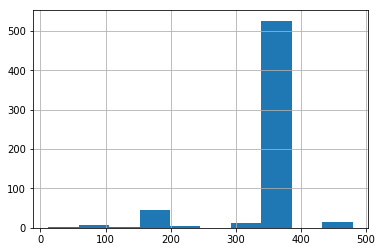

In [85]:
tr_data['Loan_Amount_Term'].hist()

In [86]:
tr_data['Loan_Amount_Term'][(tr_data['Loan_Amount_Term'] < 339.6) | (tr_data['Loan_Amount_Term'] >= 386.4)] = 0
tr_data['Loan_Amount_Term'][(tr_data['Loan_Amount_Term'] < 386.4) & (tr_data['Loan_Amount_Term'] >= 339.6)] = 1

In [87]:
tr_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0,0.0,1.0,1.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0,0.0,1.0,1.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0,0.0,0.0,1.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0,0.0,1.0,1.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0,0.0,1.0,1.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,0,1.0,3.0,1.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,0,0.0,1.0,1.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,0,0.0,2.0,1.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,0,0.0,2.0,1.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,1,2.0,3.0,1.0,1.0,Semiurban,N


In [88]:
feature = tr_data.drop(['Loan_ID','Gender','Self_Employed', 'Loan_Status'], axis=1)
label = tr_data['Loan_Status']

In [89]:
feature['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [90]:
Married_mapping = {'Yes':1, 'No':0}

In [91]:
feature['Married'] = feature['Married'].map(Married_mapping)

In [92]:
feature['Married'] = feature['Married'].fillna(1)

In [93]:
feature['Married'].isnull().sum()

0

In [94]:
feature['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [95]:
Dependents_mapping = {'0':0,'1':1,'2':2,'3+':3}

In [96]:
feature['Dependents'] = feature['Dependents'].map(Dependents_mapping)

In [97]:
feature['Dependents'] = feature['Dependents'].fillna(0)

In [98]:
feature['Dependents'].isnull().sum()

0

In [99]:
feature['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [100]:
Education_mapping = {'Graduate':1,'Not Graduate':0}

In [101]:
feature['Education'] = feature['Education'].map(Education_mapping)

In [102]:
feature['LoanAmount'].value_counts()

1.0    332
2.0    143
0.0     72
3.0     67
Name: LoanAmount, dtype: int64

In [103]:
feature['LoanAmount'] = feature['LoanAmount'].fillna(1.0)

In [104]:
feature['Loan_Amount_Term'].value_counts()

1.0    526
0.0     88
Name: Loan_Amount_Term, dtype: int64

In [105]:
feature['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [106]:
feature['Credit_History'] = feature['Credit_History'].fillna(1.0)

In [107]:
feature['Property_Area'][feature['Property_Area'] == 'Urban'] = 0
feature['Property_Area'][feature['Property_Area'] == 'Rural'] = 1
feature['Property_Area'][feature['Property_Area'] == 'Semiurban'] = 2

In [108]:
# 测试数据数据预处理过程
te_feature = te_data.drop(['Loan_ID','Gender','Self_Employed'], axis=1)
te_feature['Married'] = te_feature['Married'].fillna(1)
te_feature['Married'] = te_feature['Married'].map(Married_mapping)
te_feature['Dependents'] = te_feature['Dependents'].map(Dependents_mapping)
te_feature['Education'] = te_feature['Education'].map(Education_mapping)
te_feature['LoanAmount'] = te_feature['LoanAmount'].fillna(1.0)
te_feature['Credit_History'] = te_feature['Credit_History'].fillna(1.0)

te_feature['Property_Area'][te_feature['Property_Area'] == 'Urban'] = 0
te_feature['Property_Area'][te_feature['Property_Area'] == 'Rural'] = 1
te_feature['Property_Area'][te_feature['Property_Area'] == 'Semiurban'] = 2

te_feature['ApplicantIncome'][(te_feature['ApplicantIncome'] < 8235)] = 0
te_feature['ApplicantIncome'][(te_feature['ApplicantIncome'] < 16320) & (te_feature['ApplicantIncome'] >= 8235)] = 1
te_feature['ApplicantIncome'][(te_feature['ApplicantIncome'] >= 16320)] = 2

te_feature['CoapplicantIncome'][(te_feature['CoapplicantIncome'] < 4166.7)] = 0
te_feature['CoapplicantIncome'][(te_feature['CoapplicantIncome'] < 8333.4) & (te_feature['CoapplicantIncome'] >= 4166.7)] = 1
te_feature['CoapplicantIncome'][(te_feature['CoapplicantIncome'] >= 8333.4)] = 2

te_feature['LoanAmount'] = te_feature['LoanAmount'].fillna(te_feature['LoanAmount'].mean())
te_feature['LoanAmount'][(te_feature['LoanAmount'] < 78.1)] = 0
te_feature['LoanAmount'][(te_feature['LoanAmount'] < 147.2) & (te_feature['LoanAmount'] >= 78.1)] = 1
te_feature['LoanAmount'][(te_feature['LoanAmount'] < 216.3) & (te_feature['LoanAmount'] >= 147.2)] = 2
te_feature['LoanAmount'][(te_feature['LoanAmount'] >= 216.3)] = 3

te_feature['Loan_Amount_Term'] = te_feature['Loan_Amount_Term'].fillna(360)
te_feature['Loan_Amount_Term'][(te_feature['Loan_Amount_Term'] < 339.6) | (te_feature['Loan_Amount_Term'] >= 386.4)] = 0
te_feature['Loan_Amount_Term'][(te_feature['Loan_Amount_Term'] < 386.4) & (te_feature['Loan_Amount_Term'] >= 339.6)] = 1

In [109]:
# 建模
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=0)

In [111]:
# 逻辑回归
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.8324324324324325
[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [112]:
# 支持向量机
clf1 = SVC(kernel='linear')
clf1.fit(X_train, y_train)
y_predict1 = clf.predict(X_test)

print(accuracy_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))
print(classification_report(y_test, y_predict1))

0.8324324324324325
[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [113]:
# 决策树
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train, y_train)
y_predict2 = clf.predict(X_test)

print(accuracy_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

0.8324324324324325
[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [114]:
# 朴素贝叶斯
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_predict3 = clf.predict(X_test)

print(accuracy_score(y_test, y_predict3))
print(confusion_matrix(y_test, y_predict3))
print(classification_report(y_test, y_predict3))

0.8324324324324325
[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [115]:
# adaboost
clf4 = AdaBoostClassifier(n_estimators=50, random_state=0)
clf4.fit(X_train, y_train)
y_predict4 = clf.predict(X_test)

print(accuracy_score(y_test, y_predict4))
print(confusion_matrix(y_test, y_predict4))
print(classification_report(y_test, y_predict4))

0.8324324324324325
[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [116]:
# 随机森林
clf5 = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=0)
clf5.fit(X_train, y_train)
y_predict5 = clf.predict(X_test)

print(accuracy_score(y_test, y_predict5))
print(confusion_matrix(y_test, y_predict5))
print(classification_report(y_test, y_predict5))

0.8324324324324325
[[ 22  29]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.92      0.43      0.59        51
          Y       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [ ]:
# 结论：分类精度达到83.